In [1]:
library(reticulate)
# use_python("/opt/conda/bin/python",required=T)
# py_config()
library(rhdf5)
library(Seurat)
library(ggplot2)
library(dplyr)
library(spatialLIBD)
library(readr)
source('BEER/BEER.R')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SpatialExperiment

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package

[1] "Welcome to BEER (v0.1.9)!"


Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:IRanges’:

    collapse


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.

Loading required package: genefilter


Attaching package: ‘genefilter’


The following object is masked from ‘package:readr’:

    spec


The following objects are masked from ‘package:MatrixGenerics’:

    rowSds, rowVars


The following objects are masked from ‘package:matrixStats’:

    rowSds, rowVars


Loading required package: BiocParallel


Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [2]:
getwd()

[1] "/workspace/spatial_integration"

In [3]:
start_time = Sys.time()
# Sys.sleep(60)
end_time = Sys.time()
duration = end_time - start_time

print(start_time)
print(end_time)
print(duration)

[1] "2023-08-22 16:10:25 KST"
[1] "2023-08-22 16:10:25 KST"
Time difference of 0.0008647442 secs


In [4]:
# D1=readRDS('/home/spatial_integration/spatialLIBD/r_lib/assay_151507.rds')
# D2=readRDS('spatialLIBD/r_lib/assay_151672.rds')
# D3=readRDS('spatialLIBD/r_lib/assay_151673.rds')

# BATCH=c(rep('D1',ncol(D1)),
#         rep('D2',ncol(D2)),
#         rep('D3',ncol(D3)) )

# D12=.simple_combine(D1,D2)$combine
# D123=.simple_combine(D12,D3)$combine

# DATA = D123

# rm(D1);rm(D2);rm(D3);rm(D12)

In [5]:
spe_all <- readRDS('dataset/spe_all.rds')

In [6]:
start_time <- Sys.time()

DATA <- read_csv('dataset/datapoints/embed_all_com4_multi_unfil.csv', name_repair='minimal')
end_time <- Sys.time()
duration <- end_time - start_time
print(duration)

Rows: 1000 Columns: 11881
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (11881): , AAACAACGAATAGTTC-1, AAACAAGTATCTCCCA-1, AAACAATCTACTAGCA-1, A...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Time difference of 23.23075 secs


In [7]:
print(duration)

Time difference of 23.23075 secs


In [8]:
D1=readRDS('dataset/df_logcount_507.rds')
D2=readRDS('dataset/df_logcount_672.rds')
D3=readRDS('dataset/df_logcount_673.rds')

In [9]:
spe_507 <- spe_all[, spe_all$sample_id == '151507']
spe_672 <- spe_all[, spe_all$sample_id == '151672']
spe_673 <- spe_all[, spe_all$sample_id == '151673']

In [10]:
LAYER=c(colData(spe_507)$'layer_guess',
        colData(spe_672)$'layer_guess',
       colData(spe_673)$'layer_guess')

In [11]:
class(LAYER)

[1] "factor"

In [12]:
char_layer <- as.character(LAYER)
# char_layer

In [13]:
class(char_layer)
length(char_layer)

[1] "character"

[1] 11880

In [14]:
BATCH=c(rep('D1',ncol(D1)),
        rep('D2',ncol(D2)),
        rep('D3',ncol(D3)) )


In [15]:
D1

AAACAACGAATAGTTC-1 AAACAAGTATCTCCCA-1 AAACAATCTACTAGCA-1
ENSG00000243485 0.000000           0.0000000          0                 
ENSG00000237613 0.000000           0.0000000          0                 
ENSG00000186092 0.000000           0.0000000          0                 
ENSG00000238009 0.000000           0.0000000          0                 
ENSG00000239945 0.000000           0.0000000          0                 
ENSG00000239906 0.000000           0.0000000          0                 
ENSG00000241599 0.000000           0.0000000          0                 
ENSG00000236601 0.000000           0.0000000          0                 
ENSG00000284733 0.000000           0.0000000          0                 
ENSG00000235146 0.000000           0.0000000          0                 
ENSG00000284662 0.000000           0.0000000          0                 
ENSG00000229905 0.000000           0.0000000          0                 
ENSG00000237491 0.000000           0.0000000          0                 
ENSG00000177757 0.000000           0.0000000          0                 
ENSG00000225880 0.000000           0.0000000          0                 
ENSG00000230368 0.000000           0.0000000          0                 
ENSG00000272438 0.000000           0.0000000          0                 
ENSG00000230699 0.000000           0.0000000          0                 
ENSG00000241180 0.000000           0.0000000          0                 
ENSG00000223764 0.000000           0.0000000          0                 
ENSG00000187634 0.000000           0.0000000          0                 
ENSG00000188976 0.000000           0.0000000          0                 
ENSG00000187961 0.000000           0.0000000          0                 
ENSG00000187583 0.000000           0.0000000          0                 
ENSG00000187642 0.000000           0.0000000          0                 
ENSG00000272512 0.000000           0.0000000          0                 
ENSG00000188290 0.000000           0.0000000          0                 
ENSG00000187608 2.195668           0.8417394          0                 
ENSG00000224969 0.000000           0.0000000          0                 
ENSG00000188157 0.000000           0.0000000          0                 
⋮               ⋮                  ⋮                  ⋮                 
ENSG00000198727 4.240702           5.3437802          5.480828          
ENSG00000274175 0.000000           0.0000000          0.000000          
ENSG00000275869 0.000000           0.0000000          0.000000          
ENSG00000273554 0.000000           0.0000000          0.000000          
ENSG00000278782 0.000000           0.0000000          0.000000          
ENSG00000277761 0.000000           0.0000000          0.000000          
ENSG00000277836 0.000000           0.0000000          0.000000          
ENSG00000277666 0.000000           0.0000000          0.000000          
ENSG00000276760 0.000000           0.0000000          0.000000          
ENSG00000275249 0.000000           0.0000000          0.000000          
ENSG00000274792 0.000000           0.0000000          0.000000          
ENSG00000278704 0.000000           0.0000000          0.000000          
ENSG00000277400 0.000000           0.0000000          0.000000          
ENSG00000274847 0.000000           0.0000000          0.000000          
ENSG00000273496 0.000000           0.0000000          0.000000          
ENSG00000276256 0.000000           0.0000000          0.000000          
ENSG00000278198 0.000000           0.0000000          0.000000          
ENSG00000273748 0.000000           0.0000000          0.000000          
ENSG00000276017 0.000000           0.0000000          0.000000          
ENSG00000278817 0.000000           0.8417394          0.000000          
ENSG00000277196 0.000000           0.0000000          0.000000          
ENSG00000277630 0.000000           0.0000000          0.000000          
ENSG00000278384 0.000000           0.0000000          0.000000          
E

In [16]:
D2

AAACAAGTATCTCCCA-1 AAACACCAATAACTGC-1 AAACAGAGCGACTCCT-1
ENSG00000243485 0.0000000          0.00000            0.000000          
ENSG00000237613 0.0000000          0.00000            0.000000          
ENSG00000186092 0.0000000          0.00000            0.000000          
ENSG00000238009 0.0000000          0.00000            0.000000          
ENSG00000239945 0.0000000          0.00000            0.000000          
ENSG00000239906 0.0000000          0.00000            0.000000          
ENSG00000241599 0.0000000          0.00000            0.000000          
ENSG00000236601 0.0000000          0.00000            0.000000          
ENSG00000284733 0.0000000          0.00000            0.000000          
ENSG00000235146 0.0000000          0.00000            0.000000          
ENSG00000284662 0.0000000          0.00000            0.000000          
ENSG00000229905 0.0000000          0.00000            0.000000          
ENSG00000237491 0.0000000          0.00000            0.000000          
ENSG00000177757 0.0000000          0.00000            0.000000          
ENSG00000225880 0.0000000          0.00000            0.000000          
ENSG00000230368 0.0000000          0.00000            0.000000          
ENSG00000272438 0.0000000          0.00000            0.000000          
ENSG00000230699 0.0000000          0.00000            0.000000          
ENSG00000241180 0.0000000          0.00000            0.000000          
ENSG00000223764 0.0000000          0.00000            0.000000          
ENSG00000187634 0.0000000          0.00000            0.000000          
ENSG00000188976 0.0000000          0.00000            0.948332          
ENSG00000187961 0.0000000          0.00000            0.000000          
ENSG00000187583 0.0000000          0.00000            0.000000          
ENSG00000187642 0.0000000          0.00000            0.000000          
ENSG00000272512 0.0000000          0.00000            0.000000          
ENSG00000188290 0.7850231          1.13783            0.000000          
ENSG00000187608 1.2905658          0.00000            0.000000          
ENSG00000224969 0.0000000          0.00000            0.000000          
ENSG00000188157 0.7850231          0.00000            0.000000          
⋮               ⋮                  ⋮                  ⋮                 
ENSG00000198727 5.861123           5.615296           5.356656          
ENSG00000274175 0.000000           0.000000           0.000000          
ENSG00000275869 0.000000           0.000000           0.000000          
ENSG00000273554 0.000000           0.000000           0.000000          
ENSG00000278782 0.000000           0.000000           0.000000          
ENSG00000277761 0.000000           0.000000           0.000000          
ENSG00000277836 0.000000           0.000000           0.000000          
ENSG00000277666 0.000000           0.000000           0.000000          
ENSG00000276760 0.000000           0.000000           0.000000          
ENSG00000275249 0.000000           0.000000           0.000000          
ENSG00000274792 0.000000           0.000000           0.000000          
ENSG00000278704 0.000000           0.000000           0.000000          
ENSG00000277400 0.000000           0.000000           0.000000          
ENSG00000274847 0.000000           0.000000           0.000000          
ENSG00000273496 0.000000           0.000000           0.000000          
ENSG00000276256 0.000000           0.000000           0.000000          
ENSG00000278198 0.000000           0.000000           0.000000          
ENSG00000273748 0.000000           0.000000           0.000000          
ENSG00000276017 0.000000           0.000000           0.000000          
ENSG00000278817 0.000000           0.000000           0.000000          
ENSG00000277196 0.000000           0.000000           0.000000          
ENSG00000277630 0.000000           0.000000           0.000000          
ENSG00000278384 0.000000           0.000000           0.000000          
E

In [17]:
D3

AAACAAGTATCTCCCA-1 AAACAATCTACTAGCA-1 AAACACCAATAACTGC-1
ENSG00000243485 0.0000000          0.00000            0.0000000         
ENSG00000237613 0.0000000          0.00000            0.0000000         
ENSG00000186092 0.0000000          0.00000            0.0000000         
ENSG00000238009 0.0000000          0.00000            0.0000000         
ENSG00000239945 0.0000000          0.00000            0.0000000         
ENSG00000239906 0.0000000          0.00000            0.0000000         
ENSG00000241599 0.0000000          0.00000            0.0000000         
ENSG00000236601 0.0000000          0.00000            0.0000000         
ENSG00000284733 0.0000000          0.00000            0.0000000         
ENSG00000235146 0.0000000          0.00000            0.0000000         
ENSG00000284662 0.0000000          0.00000            0.0000000         
ENSG00000229905 0.0000000          0.00000            0.0000000         
ENSG00000237491 0.0000000          0.00000            0.0000000         
ENSG00000177757 0.0000000          0.00000            0.0000000         
ENSG00000225880 0.0000000          0.00000            0.0000000         
ENSG00000230368 0.0000000          0.00000            0.0000000         
ENSG00000272438 0.0000000          0.00000            0.0000000         
ENSG00000230699 0.0000000          0.00000            0.0000000         
ENSG00000241180 0.0000000          0.00000            0.0000000         
ENSG00000223764 0.0000000          0.00000            0.0000000         
ENSG00000187634 0.0000000          0.00000            0.0000000         
ENSG00000188976 0.0000000          0.00000            0.9662463         
ENSG00000187961 0.0000000          0.00000            0.0000000         
ENSG00000187583 0.0000000          0.00000            0.0000000         
ENSG00000187642 0.0000000          0.00000            0.0000000         
ENSG00000272512 0.0000000          0.00000            0.0000000         
ENSG00000188290 0.4655466          0.00000            0.0000000         
ENSG00000187608 0.0000000          0.00000            0.0000000         
ENSG00000224969 0.0000000          0.00000            0.0000000         
ENSG00000188157 0.4655466          2.26171            0.0000000         
⋮               ⋮                  ⋮                  ⋮                 
ENSG00000198727 5.186586           4.784984           4.792075          
ENSG00000274175 0.000000           0.000000           0.000000          
ENSG00000275869 0.000000           0.000000           0.000000          
ENSG00000273554 0.000000           0.000000           0.000000          
ENSG00000278782 0.000000           0.000000           0.000000          
ENSG00000277761 0.000000           0.000000           0.000000          
ENSG00000277836 0.000000           0.000000           0.000000          
ENSG00000277666 0.000000           0.000000           0.000000          
ENSG00000276760 0.000000           0.000000           0.000000          
ENSG00000275249 0.000000           0.000000           0.000000          
ENSG00000274792 0.000000           0.000000           0.000000          
ENSG00000278704 0.000000           0.000000           0.000000          
ENSG00000277400 0.000000           0.000000           0.000000          
ENSG00000274847 0.000000           0.000000           0.000000          
ENSG00000273496 0.000000           0.000000           0.000000          
ENSG00000276256 0.000000           0.000000           0.000000          
ENSG00000278198 0.000000           0.000000           0.000000          
ENSG00000273748 0.000000           0.000000           0.000000          
ENSG00000276017 0.000000           0.000000           0.000000          
ENSG00000278817 0.000000           0.000000           0.000000          
ENSG00000277196 0.000000           0.000000           0.000000          
ENSG00000277630 0.000000           0.000000           0.000000          
ENSG00000278384 0.000000           0.000000           0.000000          
E

In [18]:
DATA

AAACAACGAATAGTTC-1 AAACAAGTATCTCCCA-1 AAACAATCTACTAGCA-1
1     0  859.0958           1217.863           1006.988          
2     1  861.4413           1221.187           1009.736          
3     2  866.9859           1229.049           1016.238          
4     3  862.3400           1222.464           1010.791          
5     4  857.2490           1215.242           1004.822          
6     5  865.1164           1226.396           1014.043          
7     6  867.4056           1229.642           1016.727          
8     7  866.4388           1228.273           1015.597          
9     8  867.7921           1230.192           1017.183          
10    9  855.9391           1213.384           1003.285          
11   10  868.4371           1231.103           1017.938          
12   11  860.6101           1220.008           1008.763          
13   12  865.7608           1227.310           1014.801          
14   13  856.3056           1213.903           1003.716          
15   14  859.8062           1218.872           1007.823          
16   15  860.6559           1220.072           1008.816          
17   16  854.7797           1211.738           1001.925          
18   17  864.2424           1225.157           1013.020          
19   18  861.6634           1221.503           1009.998          
20   19  866.7724           1228.744           1015.987          
21   20  869.4010           1232.470           1019.066          
22   21  863.6934           1224.379           1012.375          
23   22  863.5004           1224.109           1012.152          
24   23  862.4015           1222.544           1010.860          
25   24  860.7456           1220.204           1008.925          
26   25  856.5989           1214.325           1004.062          
27   26  866.4609           1228.306           1015.622          
28   27  861.0290           1220.599           1009.252          
29   28  865.8998           1227.510           1014.965          
30   29  867.6283           1229.960           1016.991          
⋮    ⋮   ⋮                  ⋮                  ⋮                 
971  970 859.2662           1218.106           1007.190          
972  971 857.6345           1215.790           1005.275          
973  972 859.9736           1219.108           1008.017          
974  973 863.6228           1224.276           1012.291          
975  974 860.7471           1220.203           1008.922          
976  975 866.3716           1228.173           1015.515          
977  976 867.6011           1229.923           1016.959          
978  977 867.2144           1229.376           1016.506          
979  978 864.8685           1226.051           1013.757          
980  979 867.6567           1229.998           1017.024          
981  980 867.9091           1230.356           1017.319          
982  981 857.4840           1215.582           1005.102          
983  982 869.8796           1233.154           1019.630          
984  983 863.6672           1224.343           1012.346          
985  984 863.7030           1224.391           1012.387          
986  985 868.8998           1231.759           1018.479          
987  986 865.1719           1226.479           1014.111          
988  987 869.2857           1232.309           1018.933          
989  988 861.8927           1221.825           1010.265          
990  989 862.6193           1222.858           1011.118          
991  990 859.7692           1218.820           1007.780          
992  991 861.5343           1221.323           1009.848          
993  992 859.1955           1218.006           1007.105          
994  993 866.8177           1228.812           1016.041          
995  994 860.5575           1219.935           1008.702          
996  995 861.0494           1220.633           1009.278          
997  996 856.3426           1213.960           1003.761          
998  997 856.5843           1214.303           1004.045          
999  998 862.5738           1222.791           10

In [19]:
rownames(DATA)

[1] "1"    "2"    "3"    "4"    "5"    "6"    "7"    "8"    "9"    "10"  
  [11] "11"   "12"   "13"   "14"   "15"   "16"   "17"   "18"   "19"   "20"  
  [21] "21"   "22"   "23"   "24"   "25"   "26"   "27"   "28"   "29"   "30"  
  [31] "31"   "32"   "33"   "34"   "35"   "36"   "37"   "38"   "39"   "40"  
  [41] "41"   "42"   "43"   "44"   "45"   "46"   "47"   "48"   "49"   "50"  
  [51] "51"   "52"   "53"   "54"   "55"   "56"   "57"   "58"   "59"   "60"  
  [61] "61"   "62"   "63"   "64"   "65"   "66"   "67"   "68"   "69"   "70"  
  [71] "71"   "72"   "73"   "74"   "75"   "76"   "77"   "78"   "79"   "80"  
  [81] "81"   "82"   "83"   "84"   "85"   "86"   "87"   "88"   "89"   "90"  
  [91] "91"   "92"   "93"   "94"   "95"   "96"   "97"   "98"   "99"   "100" 
 [101] "101"  "102"  "103"  "104"  "105"  "106"  "107"  "108"  "109"  "110" 
 [111] "111"  "112"  "113"  "114"  "115"  "116"  "117"  "118"  "119"  "120" 
 [121] "121"  "122"  "123"  "124"  "125"  "126"  "127"  "128"  "129"  "130" 
 [131] "131"  "132"  "133"  "134"  "135"  "136"  "137"  "138"  "139"  "140" 
 [141] "141"  "142"  "143"  "144"  "145"  "146"  "147"  "148"  "149"  "150" 
 [151] "151"  "152"  "153"  "154"  "155"  "156"  "157"  "158"  "159"  "160" 
 [161] "161"  "162"  "163"  "164"  "165"  "166"  "167"  "168"  "169"  "170" 
 [171] "171"  "172"  "173"  "174"  "175"  "176"  "177"  "178"  "179"  "180" 
 [181] "181"  "182"  "183"  "184"  "185"  "186"  "187"  "188"  "189"  "190" 
 [191] "191"  "192"  "193"  "194"  "195"  "196"  "197"  "198"  "199"  "200" 
 [201] "201"  "202"  "203"  "204"  "205"  "206"  "207"  "208"  "209"  "210" 
 [211] "211"  "212"  "213"  "214"  "215"  "216"  "217"  "218"  "219"  "220" 
 [221] "221"  "222"  "223"  "224"  "225"  "226"  "227"  "228"  "229"  "230" 
 [231] "231"  "232"  "233"  "234"  "235"  "236"  "237"  "238"  "239"  "240" 
 [241] "241"  "242"  "243"  "244"  "245"  "246"  "247"  "248"  "249"  "250" 
 [251] "251"  "252"  "253"  "254"  "255"  "256"  "257"  "258"  "259"  "260" 
 [261] "261"  "262"  "263"  "264"  "265"  "266"  "267"  "268"  "269"  "270" 
 [271] "271"  "272"  "273"  "274"  "275"  "276"  "277"  "278"  "279"  "280" 
 [281] "281"  "282"  "283"  "284"  "285"  "286"  "287"  "288"  "289"  "290" 
 [291] "291"  "292"  "293"  "294"  "295"  "296"  "297"  "298"  "299"  "300" 
 [301] "301"  "302"  "303"  "304"  "305"  "306"  "307"  "308"  "309"  "310" 
 [311] "311"  "312"  "313"  "314"  "315"  "316"  "317"  "318"  "319"  "320" 
 [321] "321"  "322"  "323"  "324"  "325"  "326"  "327"  "328"  "329"  "330" 
 [331] "331"  "332"  "333"  "334"  "335"  "336"  "337"  "338"  "339"  "340" 
 [341] "341"  "342"  "343"  "344"  "345"  "346"  "347"  "348"  "349"  "350" 
 [351] "351"  "352"  "353"  "354"  "355"  "356"  "357"  "358"  "359"  "360" 
 [361] "361"  "362"  "363"  "364"  "365"  "366"  "367"  "368"  "369"  "370" 
 [371] "371"  "372"  "373"  "374"  "375"  "376"  "377"  "378"  "379"  "380" 
 [381] "381"  "382"  "383"  "384"  "385"  "386"  "387"  "388"  "389"  "390" 
 [391] "391"  "392"  "393"  "394"  "395"  "396"  "397"  "398"  "399"  "400" 
 [401] "401"  "402"  "403"  "404"  "405"  "406"  "407"  "408"  "409"  "410" 
 [411] "411"  "412"  "413"  "414"  "415"  "416"  "417"  "418"  "419"  "420" 
 [421] "421"  "422"  "423"  "424"  "425"  "426"  "427"  "428"  "429"  "430" 
 [431] "431"  "432"  "433"  "434"  "435"  "436"  "437"  "438"  "439"  "440" 
 [441] "441"  "442"  "443"  "444"  "445"  "446"  "447"  "448"  "449"  "450" 
 [451] "451"  "452"  "453"  "454"  "455"  "456"  "457"  "458"  "459"  "460" 
 [461] "461"  "462"  "463"  "464"  "465"  "466"  "467"  "468"  "469"  "470" 
 [471] "471"  "472"  "473"  "474"  "475"  "476"  "477"  "478"  "479"  "480" 
 [481] "481"  "482"  "483"  "484"  "485"  "486"  "487"  "488"  "489"  "490" 
 [491] "491"  "492"  "493"  "494"  "495"  "496"  "497"  "498"  "499"  "500" 
 [501] "501"  "502"  "503"  "504"  "505"  "506"  "507"  "508"  "509"  "510" 
 [511] "511"  "512"  "513"  "514"  "515"  "516"  "517"  "518"  "519"  "520" 

In [20]:
colnames(DATA)

[1] ""                   "AAACAACGAATAGTTC-1" "AAACAAGTATCTCCCA-1"
    [4] "AAACAATCTACTAGCA-1" "AAACACCAATAACTGC-1" "AAACAGCTTTCAGAAG-1"
    [7] "AAACAGGGTCTATATT-1" "AAACAGTGTTCCTGGG-1" "AAACATTTCCCGGATT-1"
   [10] "AAACCACTACACAGAT-1" "AAACCCGAACGAAATC-1" "AAACCGGGTAGGTACC-1"
   [13] "AAACCGTTCGTCCAGG-1" "AAACCTAAGCAGCCGG-1" "AAACCTCATGAAGTTG-1"
   [16] "AAACGAAGAACATACC-1" "AAACGACAGTCTTGCC-1" "AAACGAGACGGTTGAT-1"
   [19] "AAACGCCCGAGATCGG-1" "AAACGGGCGTACGGGT-1" "AAACGGGTTGGTATCC-1"
   [22] "AAACGGTTGCGAACTG-1" "AAACGTGTTCGCCCTA-1" "AAACTAACGTGGCGAC-1"
   [25] "AAACTCGGTTCGCAAT-1" "AAACTCGTGATATAAG-1" "AAACTGCTGGCTCCAA-1"
   [28] "AAACTTGCAAACGTAT-1" "AAAGAATGTGGACTAA-1" "AAAGACATGAAGTTTA-1"
   [31] "AAAGACCCAAGTCGCG-1" "AAAGACTGGGCGCTTT-1" "AAAGGCTACGGACCAT-1"
   [34] "AAAGGCTCTCGCGCCG-1" "AAAGGGATGTAGCAAG-1" "AAAGGGCAGCTTGAAT-1"
   [37] "AAAGGTAAGCTGTACC-1" "AAAGGTCAACGACATG-1" "AAAGTAGCATTGCTCA-1"
   [40] "AAAGTCACTGATGTAA-1" "AAAGTCGACCCTCAGT-1" "AAAGTGTGATTTATCT-1"
   [43] "AAAGTTGACTCCCGTA-1" "AAATAACCATACGGGA-1" "AAATAAGGTAGTGCCC-1"
   [46] "AAATACCTATAAGCAT-1" "AAATAGCTTAGACTTT-1" "AAATAGGGTGCTATTG-1"
   [49] "AAATCACTCCTAAACG-1" "AAATCCGATACACGCC-1" "AAATCGTGTACCACAA-1"
   [52] "AAATCTAGCCCTGCTA-1" "AAATGATTCGATCAGC-1" "AAATGCTCGTTACGTT-1"
   [55] "AAATGGCATGTCTTGT-1" "AAATGGCCCGTGCCCT-1" "AAATGGTCAATGTGCC-1"
   [58] "AAATGTATCTTATCCC-1" "AAATGTGGGTGCTCCT-1" "AAATTAACGGGTAGCT-1"
   [61] "AAATTAATAAGCGCGA-1" "AAATTACACGACTCTG-1" "AAATTACCTATCGATG-1"
   [64] "AAATTCCAGGTCCAAA-1" "AAATTGATAGTCCTTT-1" "AAATTGCGGCGGTTCT-1"
   [67] "AAATTGGTGAGAAGCA-1" "AAATTTACCGAAATCC-1" "AAATTTGCGGGTGTGG-1"
   [70] "AACAACTGGTAGTTGC-1" "AACAATACATTGTCGA-1" "AACAATTACTCTACGC-1"
   [73] "AACACACGCTCGCCGC-1" "AACACGACTGTACTGA-1" "AACACGAGACGCGGCC-1"
   [76] "AACACGCGGCCGCGAA-1" "AACAGCTGTGTGGCAA-1" "AACAGGAAATCGAATA-1"
   [79] "AACAGGATGGGCCGCG-1" "AACAGGTAGTATGGAT-1" "AACATAGCGTGTATCG-1"
   [82] "AACATATCAACTGGTG-1" "AACATCGATACGTCTA-1" "AACATTGGTCAGCCGT-1"
   [85] "AACATTGTGACTCGAG-1" "AACCAAGACTTCTCTG-1" "AACCAGTATCACTCTT-1"
   [88] "AACCATGGGATCGCTA-1" "AACCCAGAGACGGAGA-1" "AACCCGACAACCCGTG-1"
   [91] "AACCCGAGCAGAATCG-1" "AACCCGATAGGGCTTC-1" "AACCCTACTGTCAATA-1"
   [94] "AACCCTGGTGGAACCA-1" "AACCGAGCTTGGTCAT-1" "AACCGCTAAGGGATGC-1"
   [97] "AACCGTTGTGTTTGCT-1" "AACCTAAAGCCGTCCG-1" "AACCTCGCTTTAGCCC-1"
  [100] "AACCTGTCACGGAATT-1" "AACCTTTAAATACGGT-1" "AACCTTTACGACGTCT-1"
  [103] "AACGATAATGCCGTAG-1" "AACGATAGAAGGGCCG-1" "AACGATATGTCAACTG-1"
  [106] "AACGCATGATCTGGGT-1" "AACGCGAACGGCAACA-1" "AACGCGACCTTGGGCG-1"
  [109] "AACGCGGTCTCCAGCC-1" "AACGCTGTTGCTGAAA-1" "AACGGACGTACGTATA-1"
  [112] "AACGGCCATCTCCGGT-1" "AACGTACTGTGGGTAC-1" "AACGTAGTCTACCCAT-1"
  [115] "AACGTCAGACTAGTGG-1" "AACGTGATGAAGGACA-1" "AACGTGCGAAAGTCTC-1"
  [118] "AACGTTATCAGCACCT-1" "AACTACCCGTTTGTCA-1" "AACTAGCGTATCGCAC-1"
  [121] "AACTAGGCTTGGGTGT-1" "AACTCAAGTTAATTGC-1" "AACTCCAGAGCGTGTT-1"
  [124] "AACTCCTAATCCCATG-1" "AACTCGATAAACACGT-1" "AACTCGATGGCGCAGT-1"
  [127] "AACTCTCAATAGAGCG-1" "AACTCTCAGTGTGCTC-1" "AACTGAGGTCAGCGTC-1"
  [130] "AACTGATATTAGGCCT-1" "AACTGGGTCCCGACGT-1" "AACTGGGTTCGAGCCG-1"
  [133] "AACTGGTGTGGGCCTT-1" "AACTTCTGCGTCTATC-1" "AACTTGCCCGTATGCA-1"
  [136] "AACTTGCGTTCTCGCG-1" "AACTTTACGGGAGCTT-1" "AACTTTAGCTGCTGAG-1"
  [139] "AACTTTCTCGATCATG-1" "AAGAAATCACCAGATT-1" "AAGAAGGATCAGTTAG-1"
  [142] "AAGACATACGTGGTTT-1" "AAGACCCAACTGAACA-1" "AAGACTAACCCGTTGT-1"
  [145] "AAGACTCACGCCCACT-1" "AAGACTGCAAGCTACT-1" "AAGAGATGAATCGGTA-1"
  [148] "AAGAGCTCTTTATCGG-1" "AAGAGGATGTACGCGA-1" "AAGAGGCATGGATCGC-1"
  [151] "AAGAGGCCCTTTGGAA-1" "AAGATGGCACCGGACC-1" "AAGATTGGCGGAACGT-1"
  [154] "AAGCACCCTGCGTATC-1" "AAGCATACTCTCCTGA-1" "AAGCCGAAGCGGTTTA-1"
  [157] "AAGCCGCTTTACCTTG-1" "AAGCGCAGGGCTTTGA-1" "AAGCGGAGTGCGCGCA-1"
  [160] "AAGCGGCGTCATGGGT-1" "AAGCGTCCCTCATCGA-1" "AAGCTAGATCGAGTAA-1"
  [163] "AAGCTCGTGCCAAGTC-1" "AAGCTCTTTCATGGTG-1" "AAGGAGAACTTATAAG-1"
  [166] "AAGGAGCGGTTGGTGC-1" "AAGGATCGATCGCTTG-1" "AAGGATGAGGGACCTC-1"
  [169] "AAGGCAGGCTGTCTCC-1"

In [25]:
rownames(DATA) <- DATA[,1]
DATA

Warning message:
“Setting row names on a tibble is deprecated.”


ERROR: Error in `.rowNamesDF<-`(x, value = value): invalid 'row.names' length


In [26]:
DATA[,1] <- NULL
DATA

AAACAACGAATAGTTC-1 AAACAAGTATCTCCCA-1 AAACAATCTACTAGCA-1
1    859.0958           1217.863           1006.988          
2    861.4413           1221.187           1009.736          
3    866.9859           1229.049           1016.238          
4    862.3400           1222.464           1010.791          
5    857.2490           1215.242           1004.822          
6    865.1164           1226.396           1014.043          
7    867.4056           1229.642           1016.727          
8    866.4388           1228.273           1015.597          
9    867.7921           1230.192           1017.183          
10   855.9391           1213.384           1003.285          
11   868.4371           1231.103           1017.938          
12   860.6101           1220.008           1008.763          
13   865.7608           1227.310           1014.801          
14   856.3056           1213.903           1003.716          
15   859.8062           1218.872           1007.823          
16   860.6559           1220.072           1008.816          
17   854.7797           1211.738           1001.925          
18   864.2424           1225.157           1013.020          
19   861.6634           1221.503           1009.998          
20   866.7724           1228.744           1015.987          
21   869.4010           1232.470           1019.066          
22   863.6934           1224.379           1012.375          
23   863.5004           1224.109           1012.152          
24   862.4015           1222.544           1010.860          
25   860.7456           1220.204           1008.925          
26   856.5989           1214.325           1004.062          
27   866.4609           1228.306           1015.622          
28   861.0290           1220.599           1009.252          
29   865.8998           1227.510           1014.965          
30   867.6283           1229.960           1016.991          
⋮    ⋮                  ⋮                  ⋮                 
971  859.2662           1218.106           1007.190          
972  857.6345           1215.790           1005.275          
973  859.9736           1219.108           1008.017          
974  863.6228           1224.276           1012.291          
975  860.7471           1220.203           1008.922          
976  866.3716           1228.173           1015.515          
977  867.6011           1229.923           1016.959          
978  867.2144           1229.376           1016.506          
979  864.8685           1226.051           1013.757          
980  867.6567           1229.998           1017.024          
981  867.9091           1230.356           1017.319          
982  857.4840           1215.582           1005.102          
983  869.8796           1233.154           1019.630          
984  863.6672           1224.343           1012.346          
985  863.7030           1224.391           1012.387          
986  868.8998           1231.759           1018.479          
987  865.1719           1226.479           1014.111          
988  869.2857           1232.309           1018.933          
989  861.8927           1221.825           1010.265          
990  862.6193           1222.858           1011.118          
991  859.7692           1218.820           1007.780          
992  861.5343           1221.323           1009.848          
993  859.1955           1218.006           1007.105          
994  866.8177           1228.812           1016.041          
995  860.5575           1219.935           1008.702          
996  861.0494           1220.633           1009.278          
997  856.3426           1213.960           1003.761          
998  856.5843           1214.303           1004.045          
999  862.5738           1222.791           1011.063          
1000 864.8911           1226.074           1013.777          
     AAACACCAATAACTGC-1 AAACAGCTTTCAGAAG-1 AAACAGGGTCTATATT-1
1    1252.925           1154.155           1171.602          
2    1256.375           1157.316     

In [27]:
length(BATCH)

[1] 11880

In [28]:
class(BATCH)

[1] "character"

In [29]:
dim(D1)
dim(D2)
dim(D3)
dim(DATA)
# dim(dummy_dat)

[1] 33538  4226

[1] 33538  4015

[1] 33538  3639

[1]  1000 11880

In [46]:
mybeer=BEER(DATA, BATCH, GNUM=10, PCNUM=10, ROUND=1, GN=100, SEED=1, COMBAT=TRUE)

[1] "BEER start!"
[1] "2023-08-22 16:22:43 KST"
[1] "Group number (GNUM) is:"
[1] 10
[1] "Varible gene number (GN) of each batch is:"
[1] 100
[1] "ROUND is:"
[1] 1
[1] 1
[1] "D1"
[1] 2
[1] "D2"
[1] 3
[1] "D3"
[1] "Total varible gene number (GN) is:"
[1] 278


Warning message:
“Non-unique cell names (colnames) present in the input matrix, making unique”
Found3batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Centering and scaling data matrix



[1] "Calculating PCs ..."


PC_ 1 
Positive:  477 
Negative:  252 

16:22:47 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

16:22:47 Read 11880 rows and found 10 numeric columns

16:22:47 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

16:22:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:22:47 Writing NN index file to temp file /tmp/Rtmp8m43Tg/file295c30166836a6

16:22:47 Searching Annoy index using 1 thread, search_k = 3000

16:22:50 Annoy recall = 100%

16:22:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

16:22:53

[1] "Get group for:"
[1] "D1"
[1] "Group Number:"
[1] 10
[1] "Get group for:"
[1] "D2"
[1] "Group Number:"
[1] 10
[1] "Get group for:"
[1] "D3"
[1] "Group Number:"
[1] 10
[1] "Finding MN pairs..."
[1] "1 / 30"
[1] "ROUND:"
[1] 1
[1] "Number of MN pairs:"
[1] 3
[1] "Evaluating PCs ..."
[1] "Start"


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 1


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 2


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 3


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 4


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 5


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 6


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 7


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 8


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 9


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 10
[1] "Finished!!!"
[1] "############################################################################"
[1] "BEER cheers !!! All main steps finished."
[1] "############################################################################"
[1] "2023-08-22 16:22:57 KST"


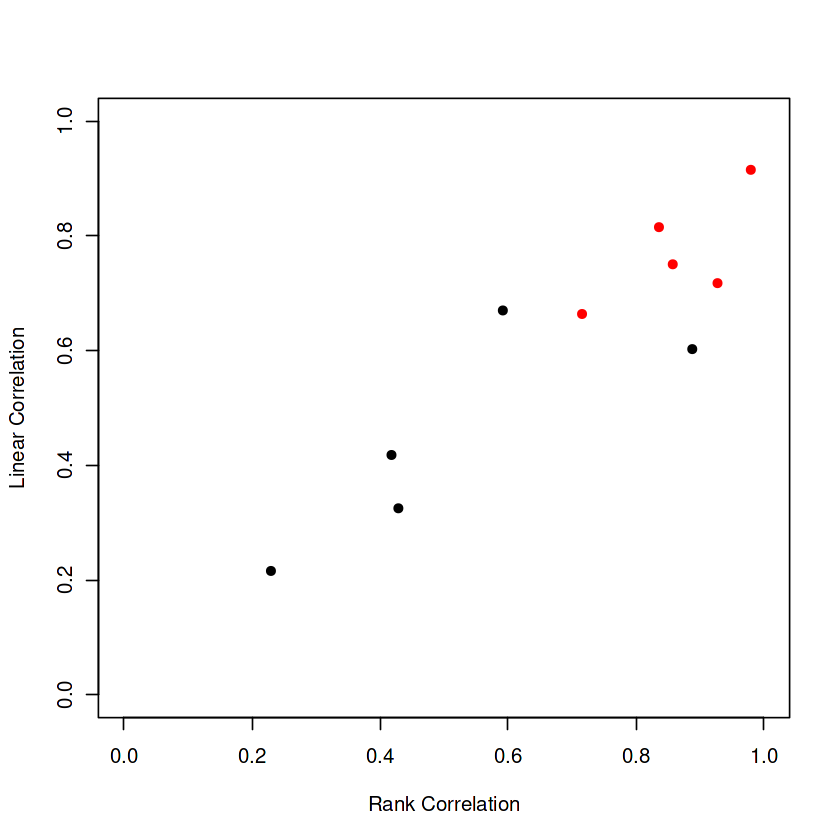

In [47]:
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))

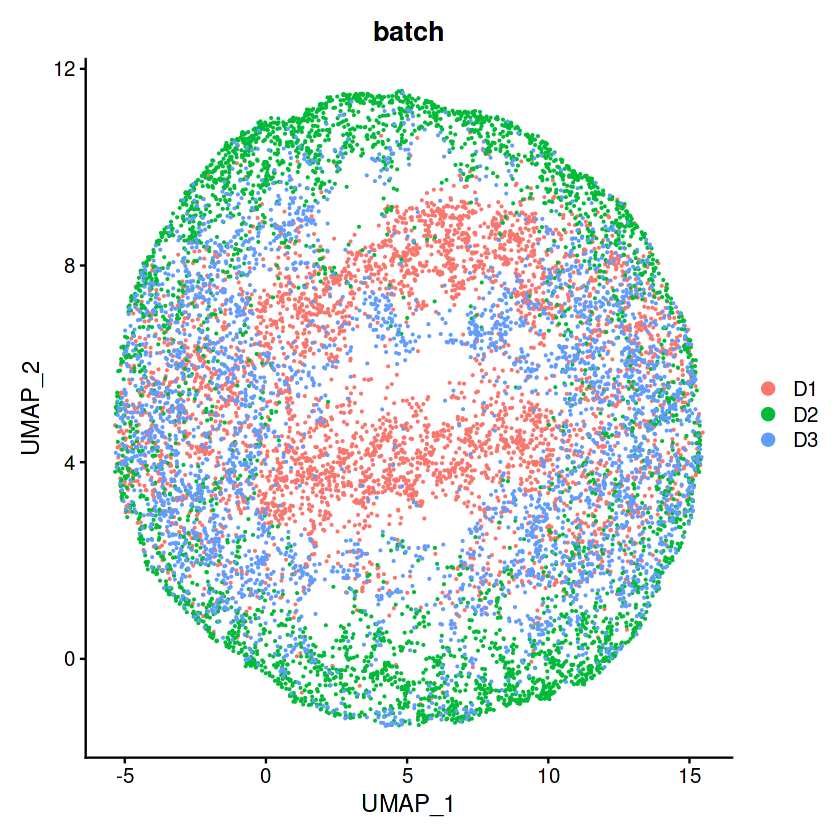

In [48]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc@meta.data$orig.ident=char_layer
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

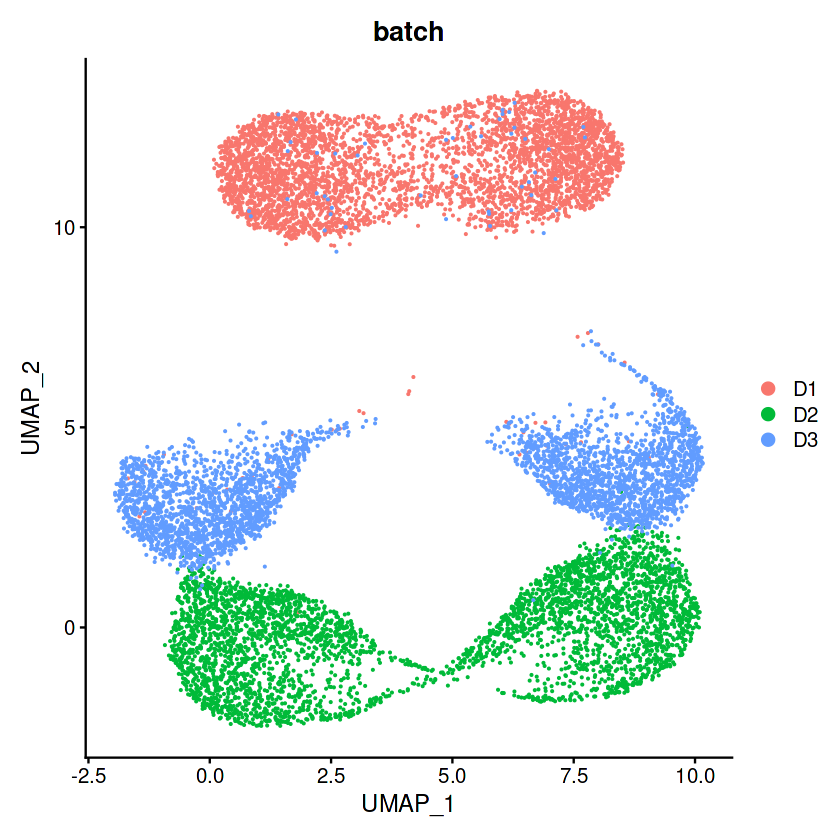

In [38]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc@meta.data$orig.ident=char_layer
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

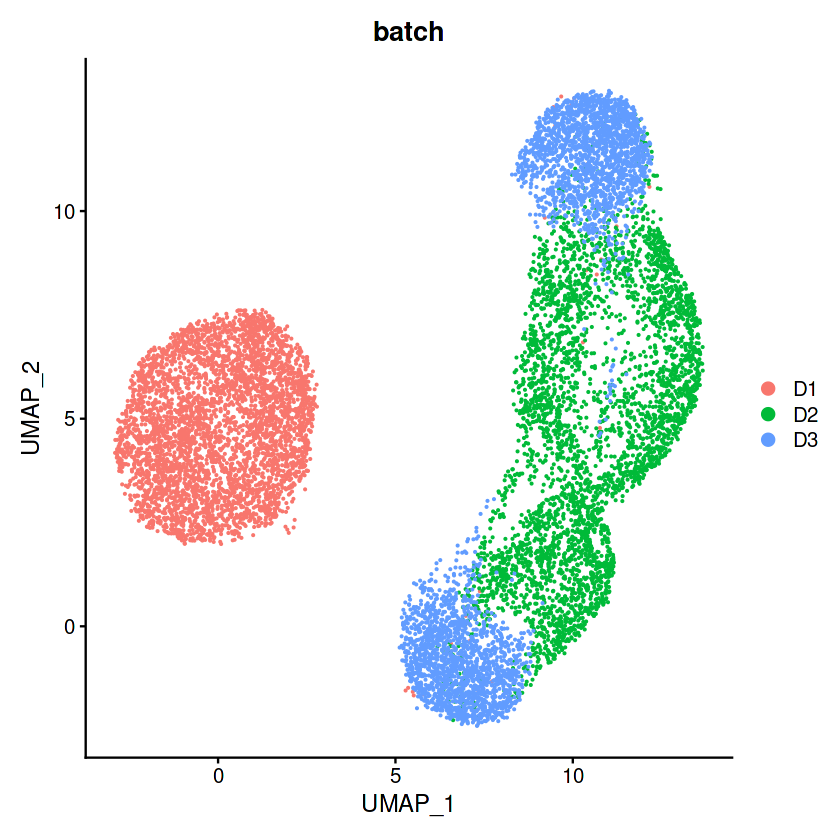

In [42]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc@meta.data$orig.ident=char_layer
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

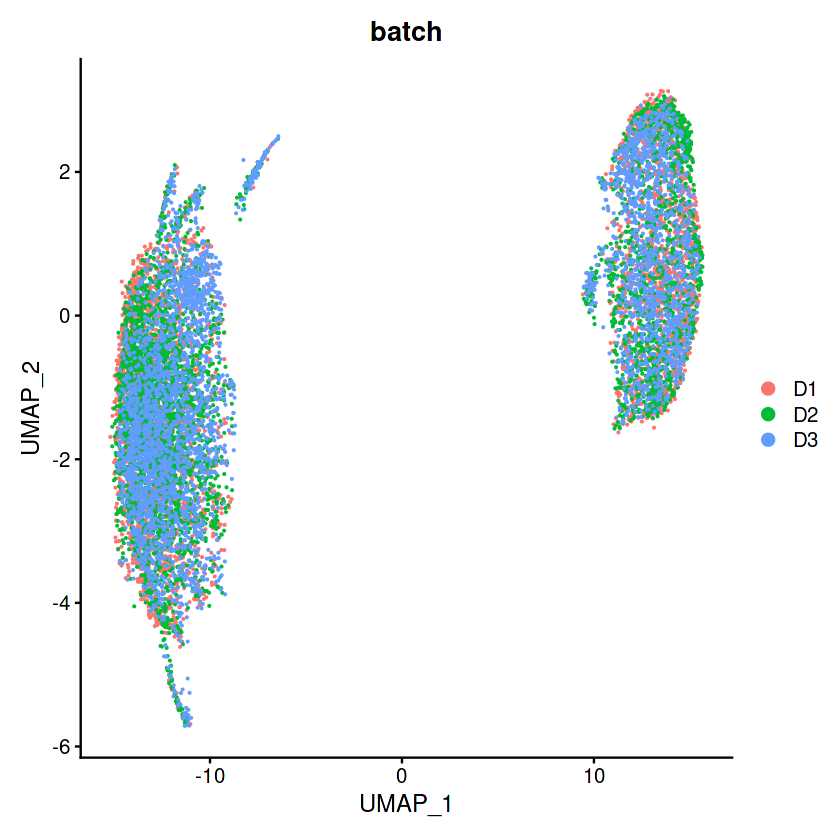

In [42]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc@meta.data$orig.ident=char_layer
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

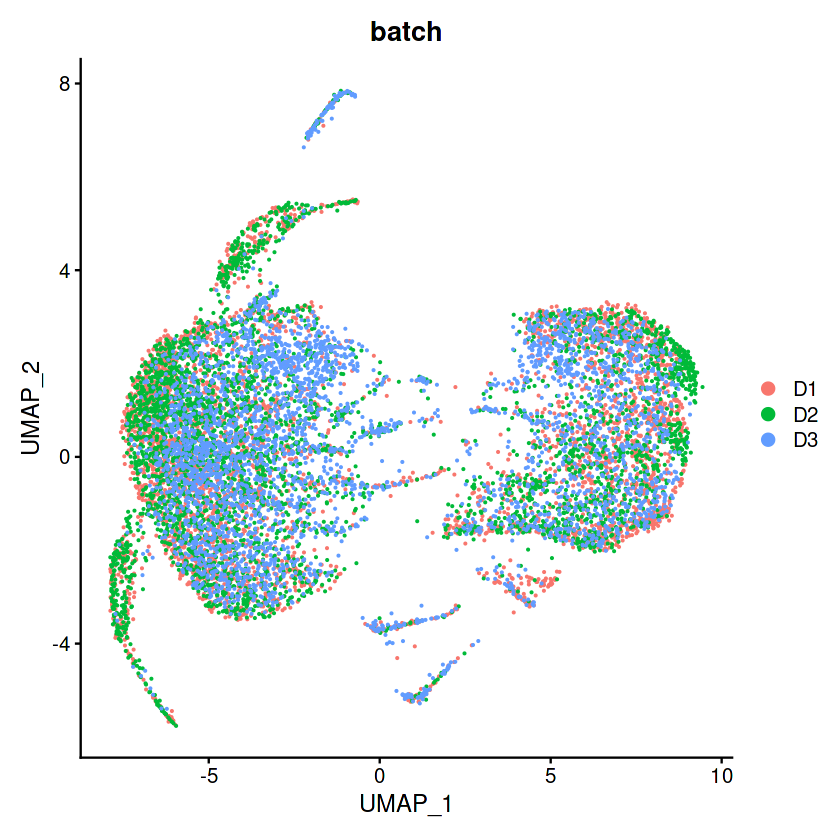

In [29]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc@meta.data$orig.ident=char_layer
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

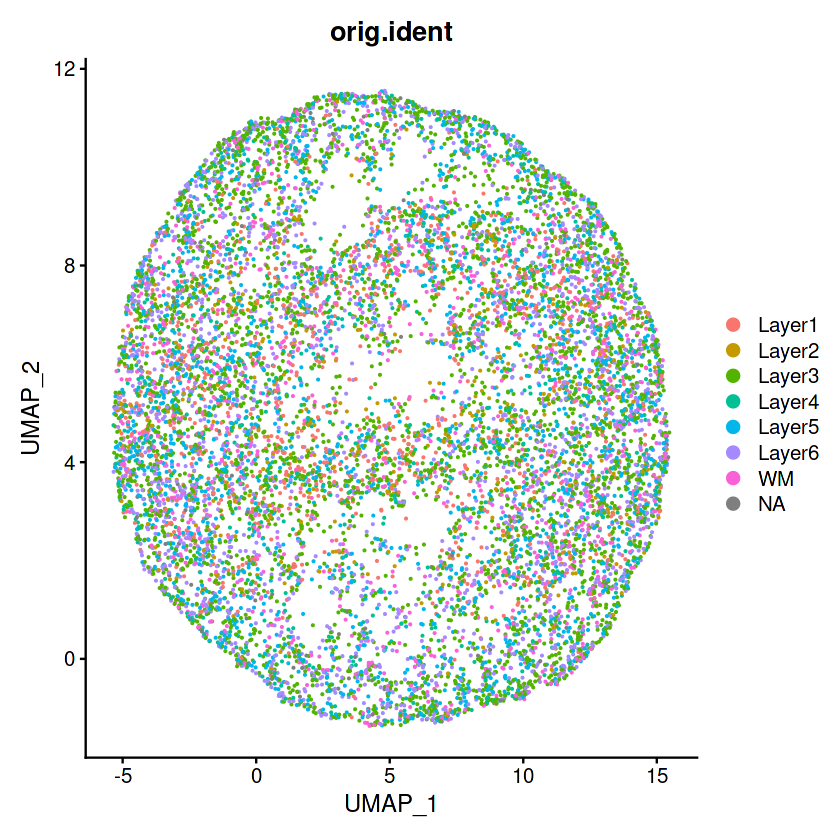

In [49]:
# pbmc <- mybeer$seurat
# PCUSE <- mybeer$select
# pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='orig.ident', pt.size=0.1)  

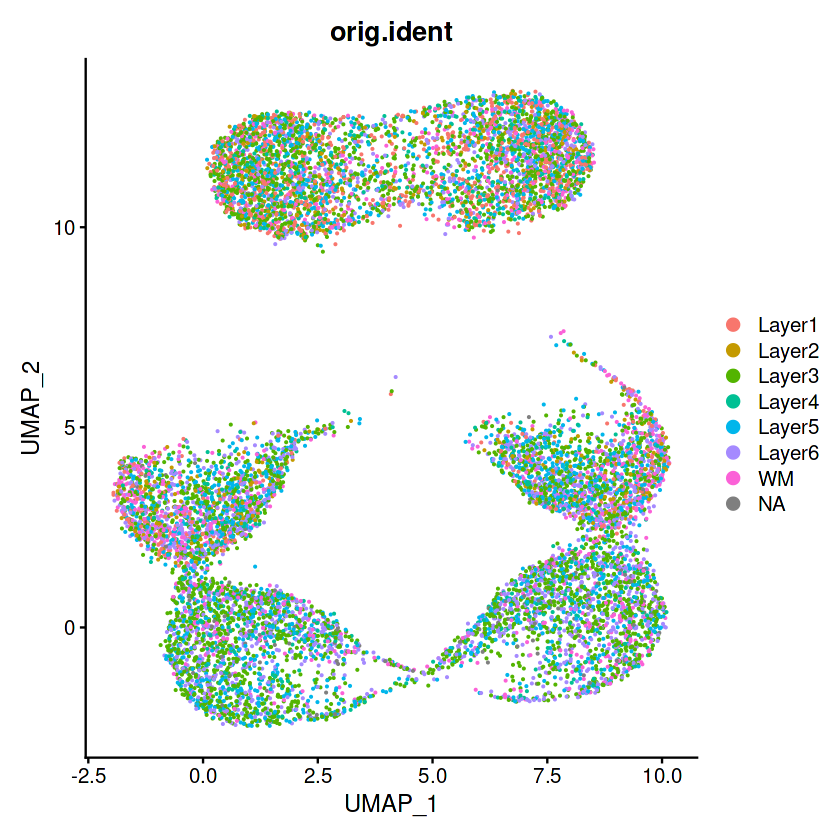

In [39]:
# pbmc <- mybeer$seurat
# PCUSE <- mybeer$select
# pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='orig.ident', pt.size=0.1)  

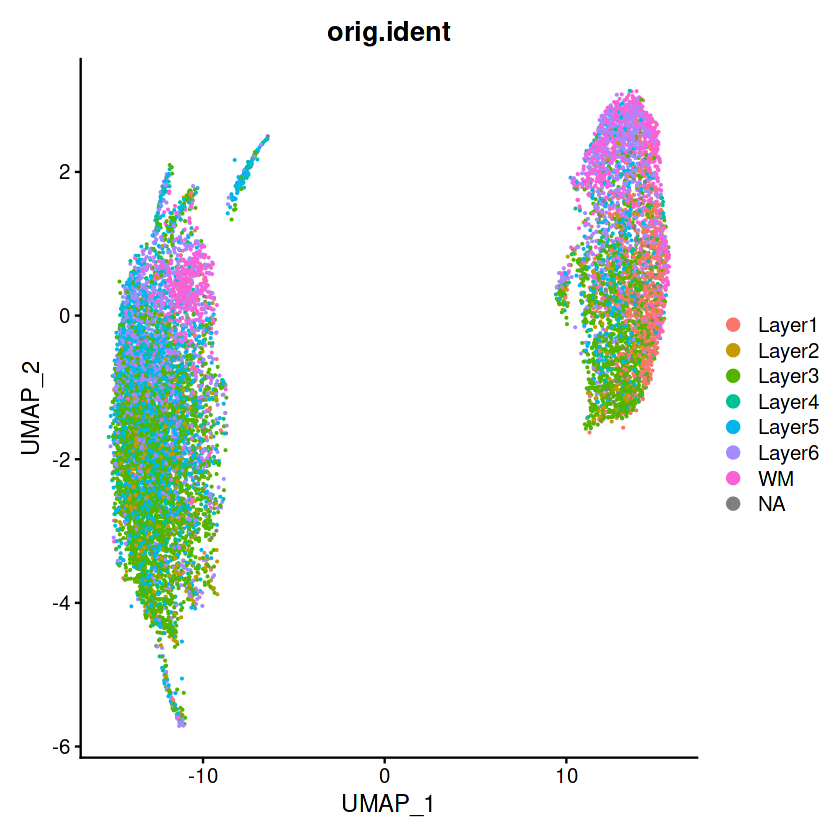

In [43]:
# pbmc <- mybeer$seurat
# PCUSE <- mybeer$select
# pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='orig.ident', pt.size=0.1)  

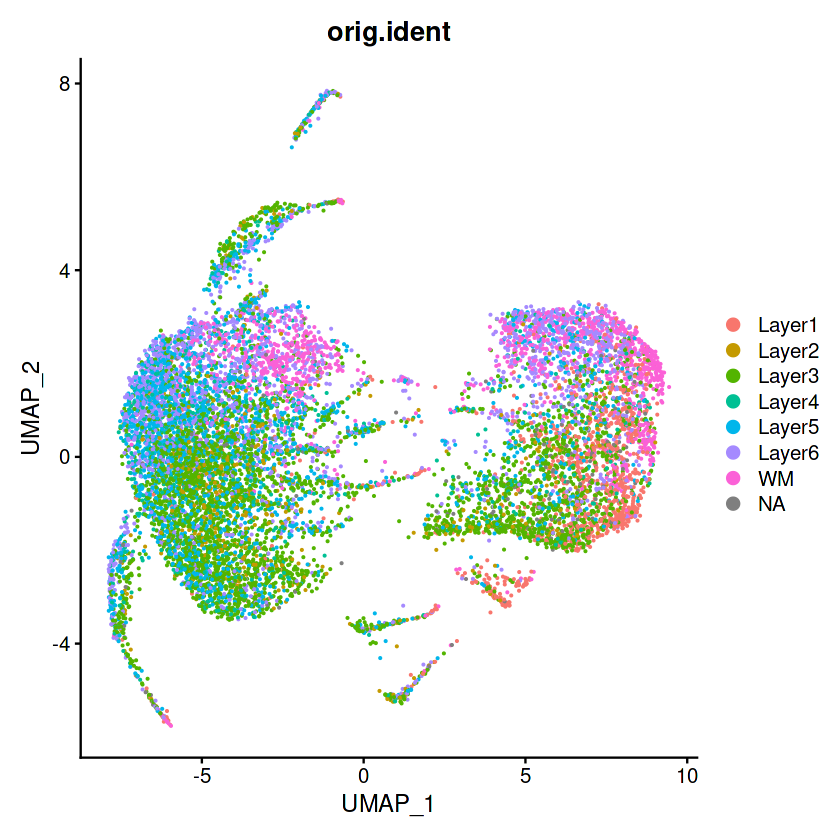

In [30]:
# pbmc <- mybeer$seurat
# PCUSE <- mybeer$select
# pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='orig.ident', pt.size=0.1)  

In [ ]:
param <- 'com4m_unfil_umap_plot_gg_0822_gnum50_pc30_GN1000_R2.png'
par_only <- '_gnum50_pc30_GN1000_R2.png'

In [36]:
layer <- paste('layer',param,sep='_')

In [37]:
umap_plot <- DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1) 
ggsave(param,umap_plot)

Saving 6.67 x 6.67 in image


In [38]:
umap_plot <- DimPlot(pbmc, reduction='umap', group.by='orig.ident', pt.size=0.1) 
ggsave(layer,umap_plot)

Saving 6.67 x 6.67 in image


In [40]:
png(paste('com4a_unfil_corr_plot_0816',par_only))
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))
dev.off()

png 
  2

Centering and scaling data matrix

PC_ 1 
Positive:  3457 
Negative:  ENSG00000142192 



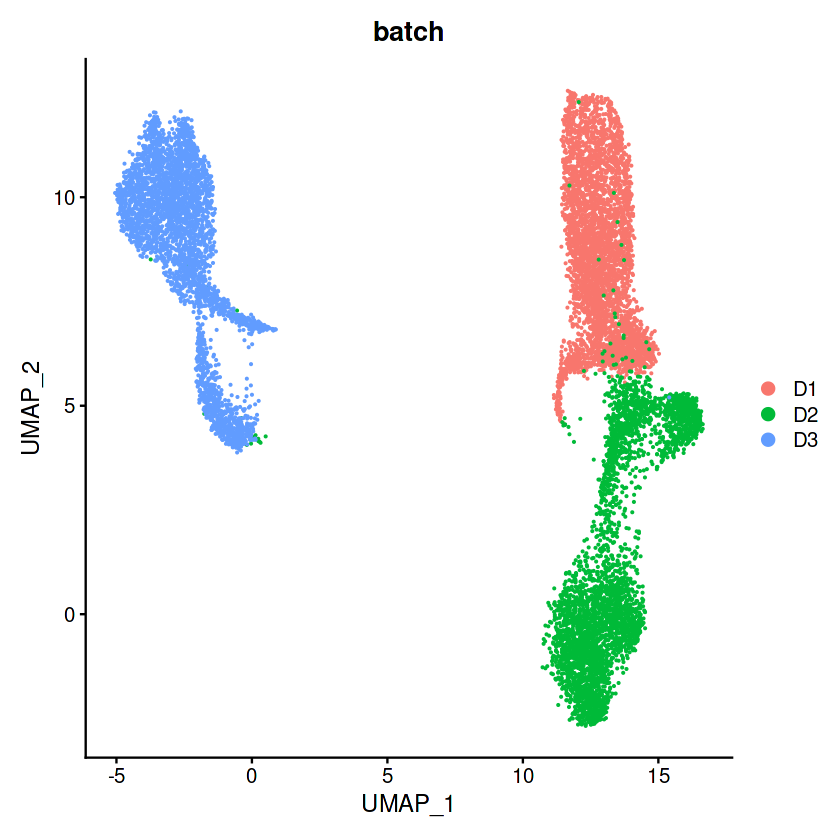

In [36]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch@meta.data$orig.ident=char_layer
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Centering and scaling data matrix

PC_ 1 
Positive:  ENSG00000175874 
Negative:  ENSG00000204792-spat 



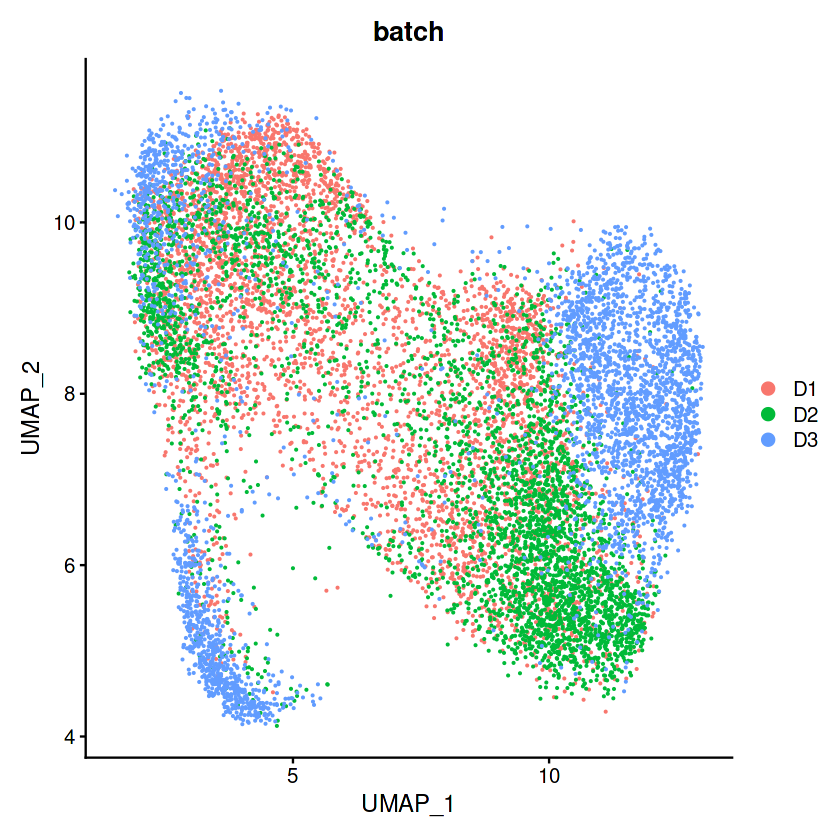

In [31]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch@meta.data$orig.ident=char_layer
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

Centering and scaling data matrix

PC_ 1 
Positive:  10482 
Negative:  4256 



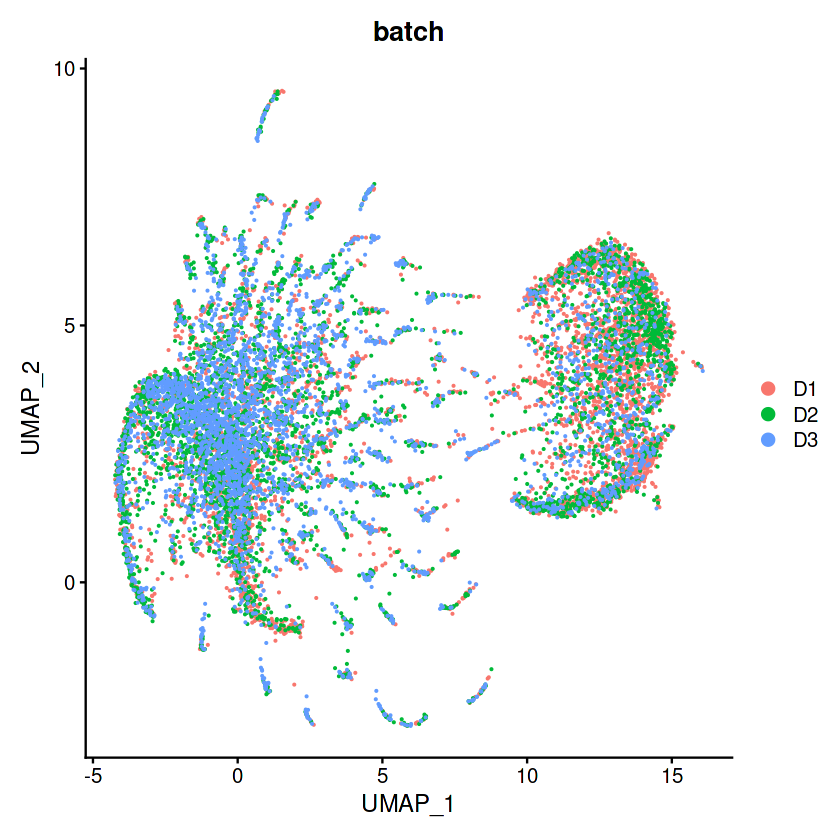

In [44]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch@meta.data$orig.ident=char_layer
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

Warning message:
“Non-unique cell names (colnames) present in the input matrix, making unique”
Centering and scaling data matrix

PC_ 1 
Positive:  978 
Negative:  774 



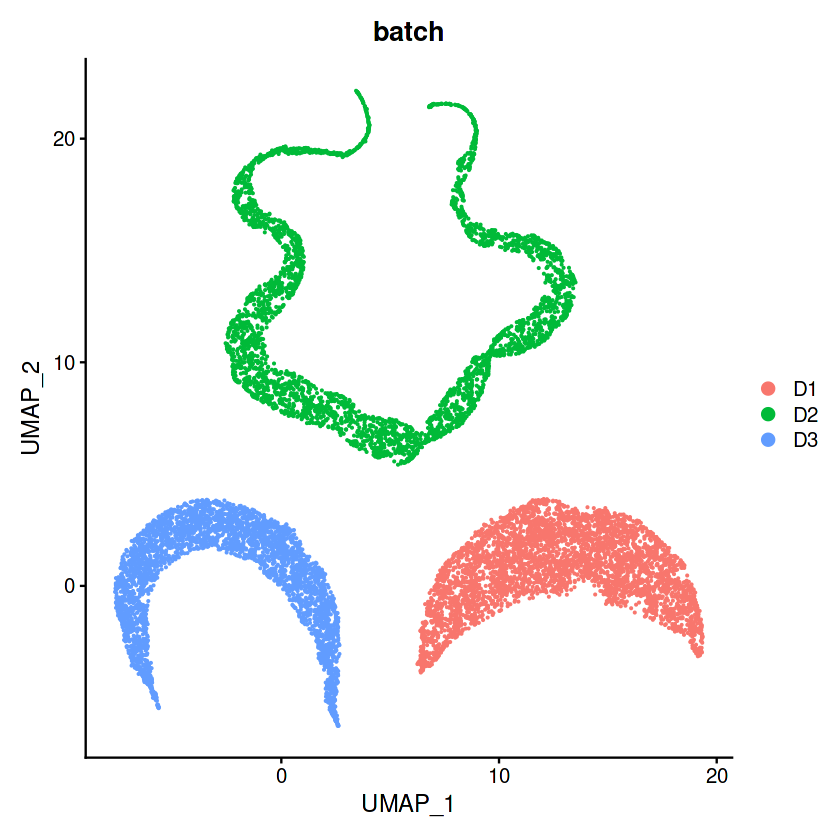

In [34]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch@meta.data$orig.ident=char_layer
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

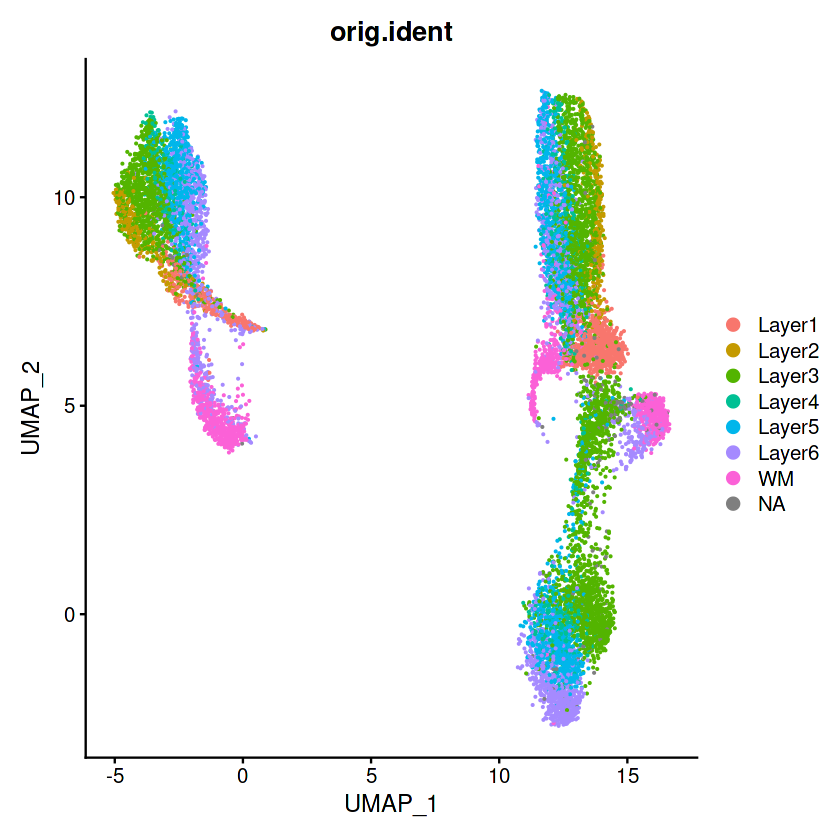

In [37]:
DimPlot(pbmc_batch, reduction='umap', group.by='orig.ident', pt.size=0.1) 

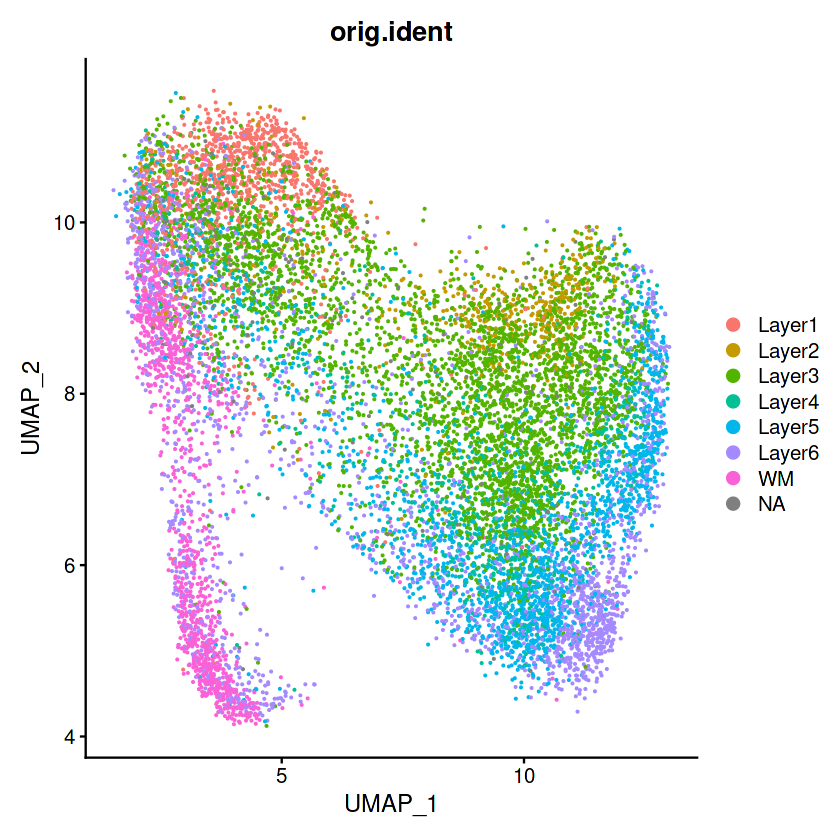

In [32]:
DimPlot(pbmc_batch, reduction='umap', group.by='orig.ident', pt.size=0.1) 

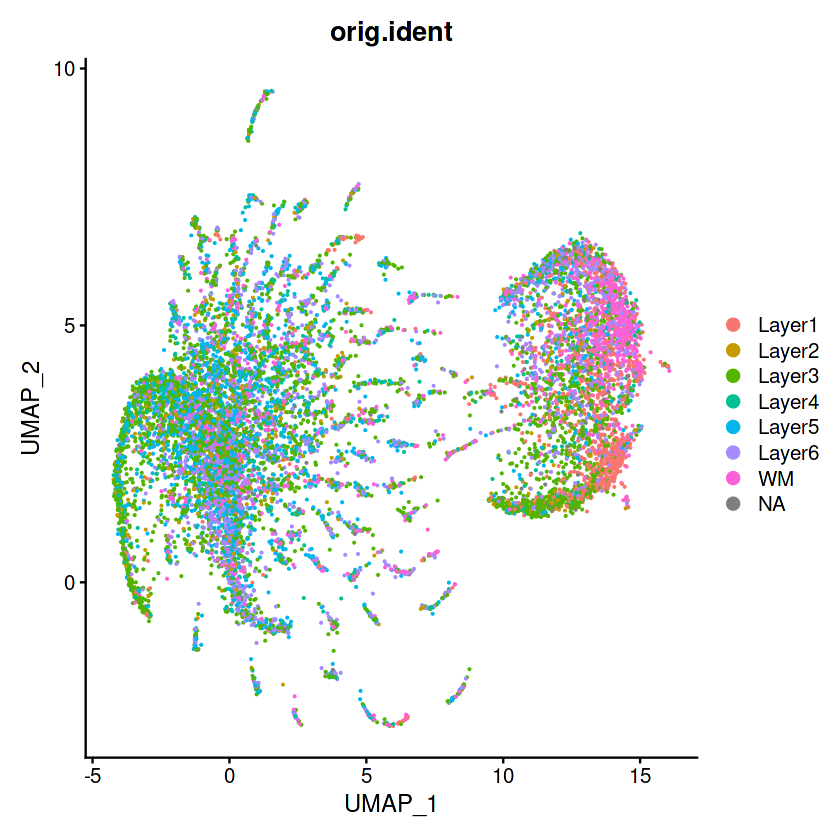

In [45]:
DimPlot(pbmc_batch, reduction='umap', group.by='orig.ident', pt.size=0.1) 

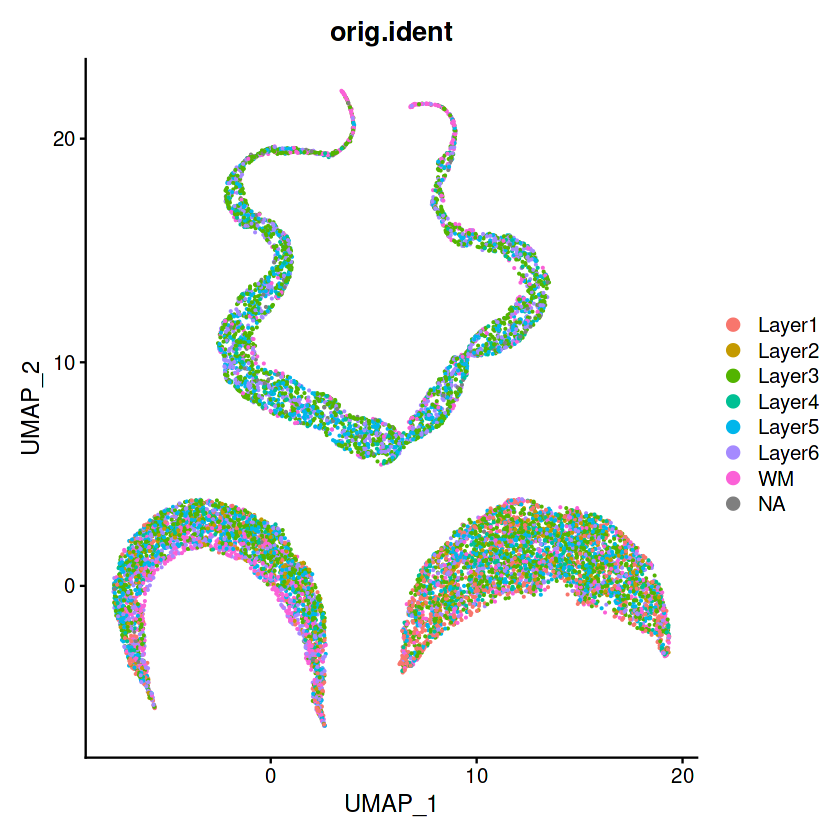

In [35]:
DimPlot(pbmc_batch, reduction='umap', group.by='orig.ident', pt.size=0.1) 

Centering and scaling data matrix

PC_ 1 
Positive:  3457 
Negative:  ENSG00000142192 



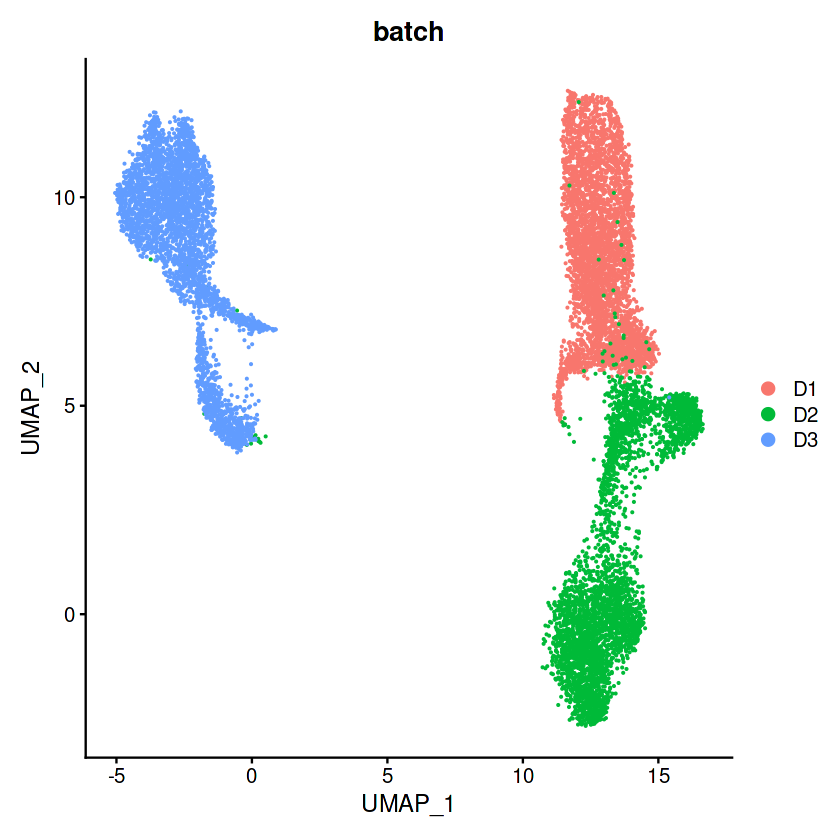

In [21]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

In [33]:
plot_save <- DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1)
ggsave('com4a_unfil_umap_plot_baserow_0816_gnum50_pc30_GN1000_R2.png',plot_save)

Saving 6.67 x 6.67 in image


In [34]:
plot_save <- DimPlot(pbmc_batch, reduction='umap', group.by='orig.ident', pt.size=0.1)
ggsave('layer_com4a_unfil_umap_plot_baserow_0816_gnum50_pc30_GN1000_R2.png',plot_save)

Saving 6.67 x 6.67 in image


In [31]:
pbmc@meta.data

orig.ident nCount_RNA nFeature_RNA batch group map
AAACAACGAATAGTTC.1   Layer1     4761.129   6828         D1    D1_26 NA 
AAACAAGTATCTCCCA.1   Layer3     5525.503   8271         D1    D1_10 V1 
AAACAATCTACTAGCA.1   Layer1     5072.243   7194         D1    D1_16 NA 
AAACACCAATAACTGC.1   WM         5609.661   7997         D1    D1_4  NA 
AAACAGCTTTCAGAAG.1   Layer6     5389.841   7721         D1    D1_37 NA 
AAACAGGGTCTATATT.1   Layer6     5417.953   8236         D1    D1_6  NA 
AAACAGTGTTCCTGGG.1   WM         5242.483   7451         D1    D1_28 NA 
AAACATTTCCCGGATT.1   Layer5     5592.206   8448         D1    D1_49 NA 
AAACCACTACACAGAT.1   Layer3     5629.805   9012         D1    D1_19 V1 
AAACCCGAACGAAATC.1   Layer3     5538.219   8494         D1    D1_19 V1 
AAACCGGGTAGGTACC.1   Layer5     5443.397   8306         D1    D1_10 V1 
AAACCGTTCGTCCAGG.1   Layer6     5432.690   8082         D1    D1_47 V1 
AAACCTAAGCAGCCGG.1   Layer6     5459.282   8362         D1    D1_47 V1 
AAACCTCATGAAGTTG.1   Layer5     5421.469   7818         D1    D1_40 NA 
AAACGAAGAACATACC.1   Layer1     4704.050   6743         D1    D1_50 NA 
AAACGACAGTCTTGCC.1   Layer3     5478.361   8296         D1    D1_2  NA 
AAACGAGACGGTTGAT.1   Layer3     5098.971   7298         D1    D1_1  NA 
AAACGCCCGAGATCGG.1   Layer2     5573.465   8602         D1    D1_19 V1 
AAACGGGCGTACGGGT.1   Layer5     5625.336   8982         D1    D1_41 V1 
AAACGGGTTGGTATCC.1   Layer1     5148.649   7241         D1    D1_8  NA 
AAACGGTTGCGAACTG.1   WM         4969.941   7003         D1    D1_42 NA 
AAACGTGTTCGCCCTA.1   Layer1     5336.295   7406         D1    D1_29 NA 
AAACTAACGTGGCGAC.1   Layer1     5295.492   7715         D1    D1_36 NA 
AAACTCGGTTCGCAAT.1   Layer6     5593.704   8695         D1    D1_41 V1 
AAACTCGTGATATAAG.1   Layer1     4945.384   6980         D1    D1_42 NA 
AAACTGCTGGCTCCAA.1   Layer4     5181.130   7433         D1    D1_39 NA 
AAACTTGCAAACGTAT.1   Layer6     5538.401   8491         D1    D1_49 NA 
AAAGAATGTGGACTAA.1   Layer6     5643.932   8738         D1    D1_49 NA 
AAAGACATGAAGTTTA.1   Layer2     5587.404   8611         D1    D1_19 V1 
AAAGACCCAAGTCGCG.1   Layer2     5437.796   8388         D1    D1_2  NA 
⋮                    ⋮          ⋮          ⋮            ⋮     ⋮     ⋮  
TTGGCCTAGAATTTCG.1.2 Layer3     6656.609   11465        D3    D3_10 V2 
TTGGCTCAATATGTGT.1.2 NA         6241.238    9865        D3    D3_7  NA 
TTGGCTCGCATGAGAC.1.2 Layer4     5970.849    9143        D3    D3_48 NA 
TTGGGAAGACGAGCCG.1.2 Layer6     6320.144    9843        D3    D3_24 NA 
TTGGGACACTGCCCGC.1.2 Layer6     6242.602    9980        D3    D3_23 NA 
TTGGGACGTAAGAGTT.1.2 Layer3     6592.293   11569        D3    D3_10 V2 
TTGGGCGGCGGTTGCC.1.2 Layer5     6489.265   10578        D3    D3_44 NA 
TTGGTCACACTCGTAA.1.2 WM         6502.358   10321        D3    D3_24 NA 
TTGGTTGCGGTGCGCG.1.2 WM         6240.162    9749        D3    D3_18 NA 
TTGTAAGGACCTAAGT.1.2 WM         6262.835    9635        D3    D3_30 NA 
TTGTAAGGCCAGTTGG.1.2 Layer5     6439.362   10228        D3    D3_4  NA 
TTGTAATCCGTACTCG.1.2 Layer6     6272.377    9745        D3    D3_27 NA 
TTGTATCACACAGAAT.1.2 Layer3     6435.733   10222        D3    D3_6  NA 
TTGTCGTTCAGTTACC.1.2 Layer5     6132.460    9385        D3    D3_42 NA 
TTGTGAACCTAATCCG.1.2 Layer4     6570.411   11697        D3    D3_34 V2 
TTGTGAGGCATGACGC.1.2 Layer5     6006.731    9379        D3    D3_42 NA 
TTGTGCAGCCACGTCA.1.2 Layer5     6575.724   10507        D3    D3_17 V2 
TTGTGGCCCTGACAGT.1.2 Layer5     6433.612   10402        D3    D3_11 NA 
TTGTGGTAGGAGGGAT.1.2 WM         6077.791    9299        D3    D3_30 NA 
TTGTGGTGGTACTAAG.1.2 Layer3     6654.725   11168        D3    D3_13 NA 
TTGTGTATGCCACCAA.1.2 Layer6     5712.986    8937        D3    D3_9  NA 
TTGTGTTTCCCGAAAG.1.2 Layer6     6065.361    9242        D3    D3_48 NA 
TTGTTAGCAAATTCGA.1.2 Layer4     6411.472   10436        D3    D3_31 NA 
TTGTTCAGTGTGCTAC.1.2 Layer5     6549.997   11184        D3   

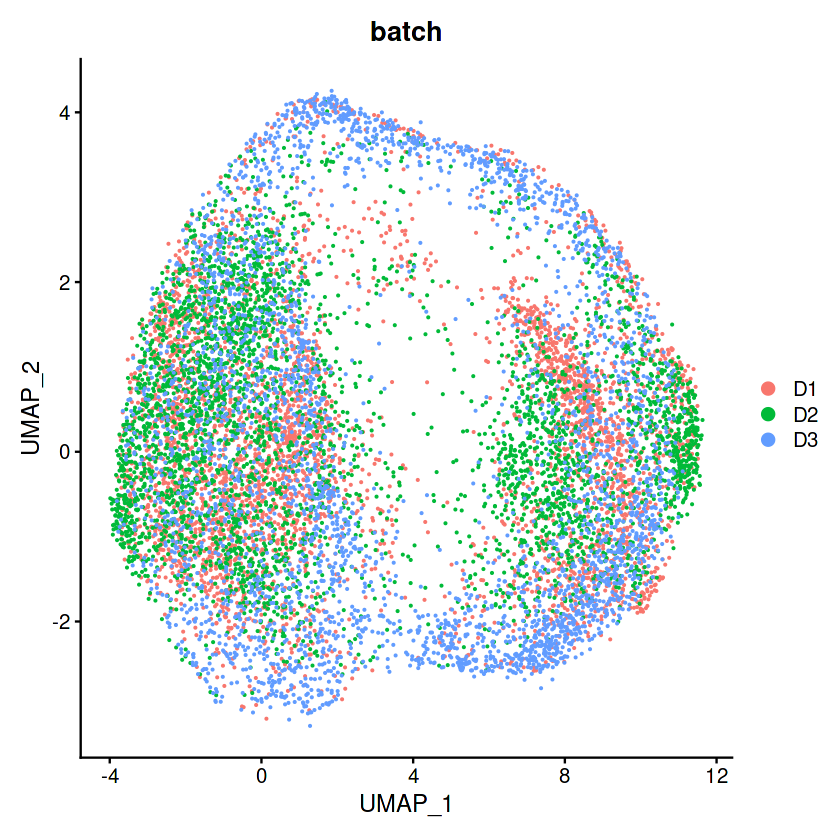

In [23]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

In [24]:
# library(ggplot2)
umap_plot <- DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  
ggsave('umap_plot_gg.png',umap_plot)

ERROR: Error in ggsave("umap_plot_gg.png", umap_plot): could not find function "ggsave"


In [2]:
D1=readRDS('demo_BEER/MGH36.RDS')
D2=readRDS('demo_BEER/MGH53.RDS')
D3=readRDS('demo_BEER/MGH54.RDS')
D4=readRDS('demo_BEER/MGH60.RDS')
D5=readRDS('demo_BEER/MGH93.RDS')
D6=readRDS('demo_BEER/MGH97.RDS')

BATCH=c(rep('D1',ncol(D1)),
        rep('D2',ncol(D2)),
        rep('D3',ncol(D3)),
        rep('D4',ncol(D4)),
        rep('D5',ncol(D5)),
        rep('D6',ncol(D6)) )
        
D12=.simple_combine(D1,D2)$combine
D34=.simple_combine(D3,D4)$combine
D56=.simple_combine(D5,D6)$combine
D1234=.simple_combine(D12,D34)$combine
D123456=.simple_combine(D1234,D56)$combine

DATA=D123456   

# rm(D1);rm(D2);rm(D3);rm(D4);rm(D5);rm(D6)
# rm(D12);rm(D34);rm(D56);rm(D1234);rm(D123456)

[1] "BEER start!"
[1] "2023-03-09 15:55:44 KST"


Loading required package: stringi



[1] "Group number (GNUM) is:"
[1] 30
[1] "Varible gene number (GN) of each batch is:"
[1] 2000
[1] "ROUND is:"
[1] 1
[1] 1
[1] "D1"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 2
[1] "D2"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 3
[1] "D3"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 4
[1] "D4"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 5
[1] "D5"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 6
[1] "D6"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "Total varible gene number (GN) is:"
[1] 4554


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Found 991 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found6batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Centering and scaling data matrix



[1] "Calculating PCs ..."


PC_ 1 
Positive:  BCAN 
Negative:  C1QC 



[1] "Get group for:"
[1] "D1"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D2"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D3"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D4"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D5"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D6"
[1] "Group Number:"
[1] 30
[1] "Finding MN pairs..."
[1] "1 / 180"
[1] "101 / 180"
[1] "ROUND:"
[1] 1
[1] "Number of MN pairs:"
[1] 34
[1] "Evaluating PCs ..."
[1] "Start"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] "Finished!!!"
[1] "############################################################################"
[1] "BEER cheers !!! All main steps finished."
[1] "###################

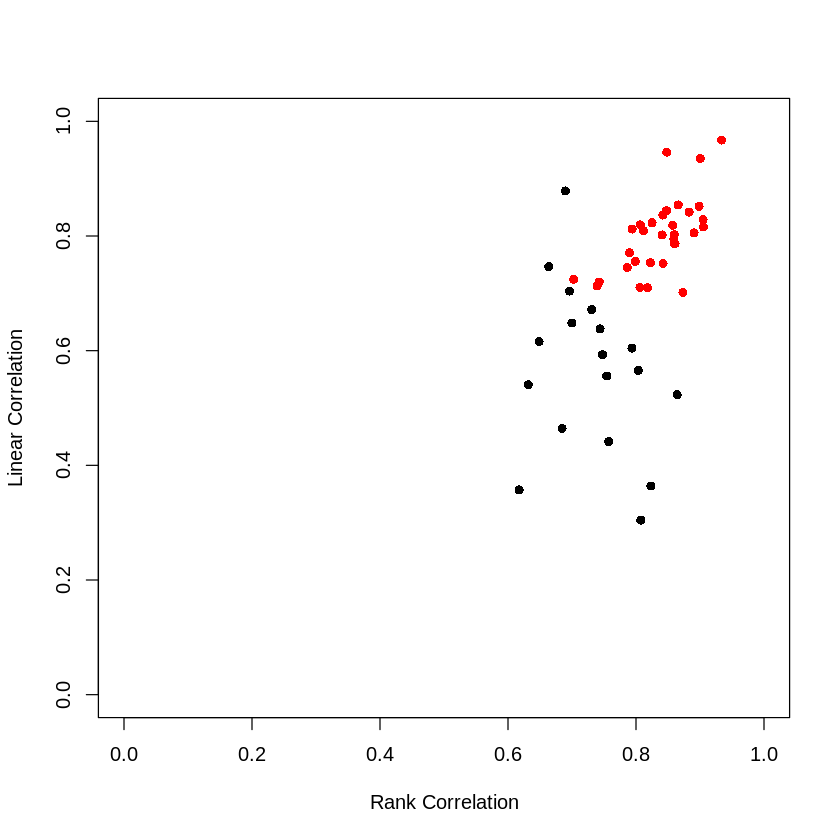

In [3]:
mybeer=BEER(DATA, BATCH, GNUM=30, PCNUM=50, ROUND=1, GN=2000, SEED=1, COMBAT=TRUE )

# Check selected PCs
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Centering and scaling data matrix

PC_ 1 
Positive:  LAPTM5 
Negative:  BCAN 



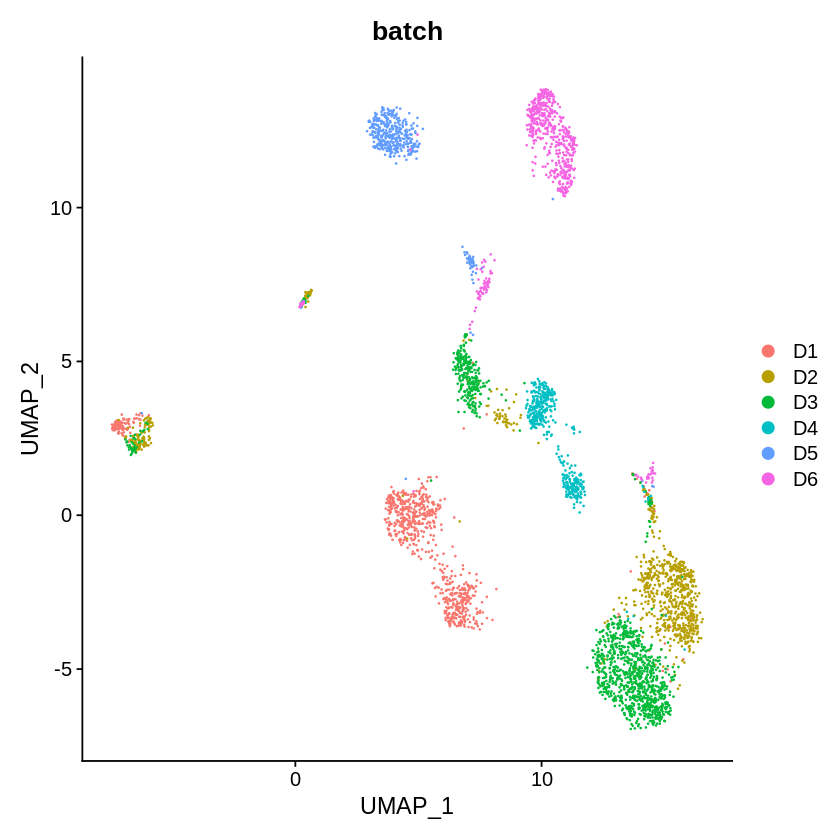

In [4]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

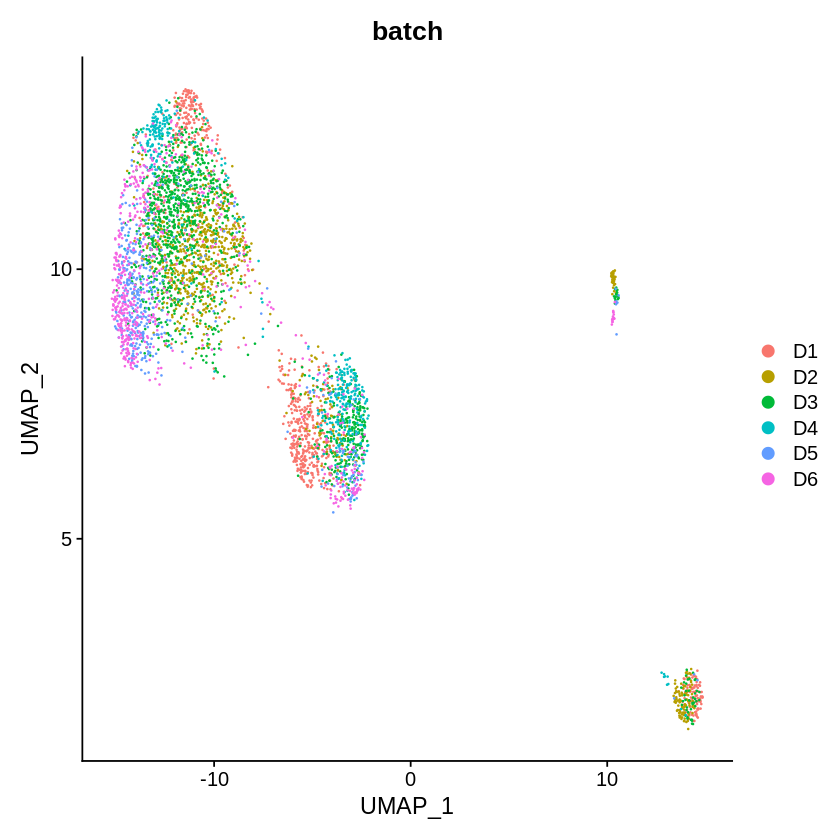

In [5]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

Warning message:
“The following arguments are not used: check_duplicates”


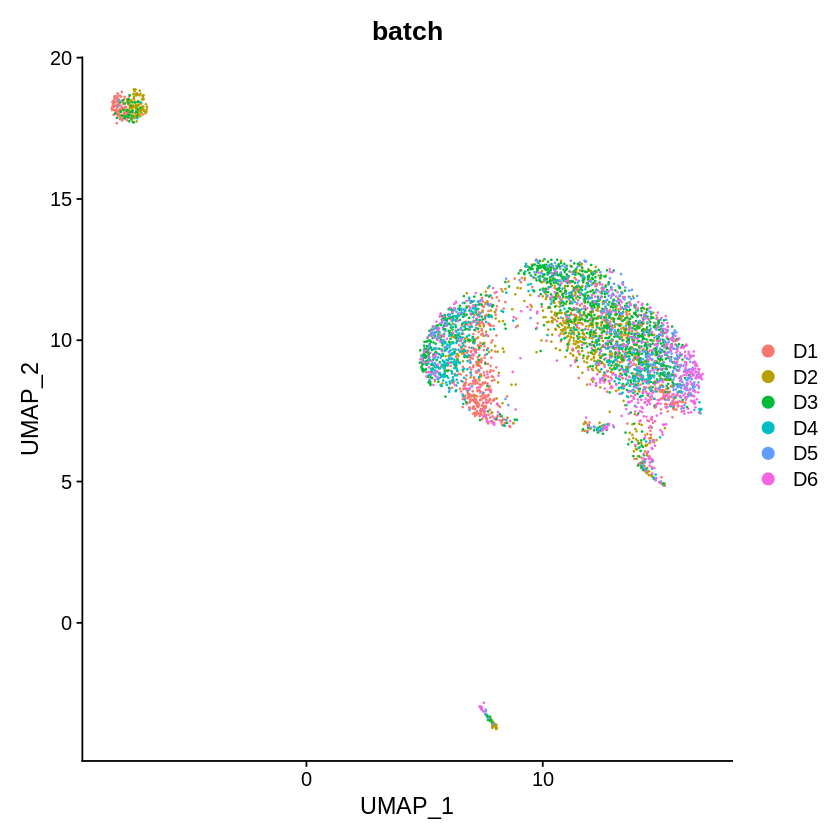

In [6]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, check_duplicates=FALSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

In [ ]:
D1 <- read.table("demo_BEER/DATA1_MAT.txt", sep='\t', row.names=1, header=T)
D2 <- read.table("demo_BEER/DATA2_MAT.txt", sep='\t', row.names=1, header=T)

In [ ]:
colnames(D1)=paste0('D1_', colnames(D1))
colnames(D2)=paste0('D2_', colnames(D2))

DATA=.simple_combine(D1,D2)$combine

BATCH=rep('D2',ncol(DATA))
BATCH[c(1:ncol(D1))]='D1'

In [ ]:
mybeer=BEER(DATA, BATCH, GNUM=30, PCNUM=50, ROUND=1, GN=2000, SEED=1, COMBAT=TRUE, RMG=NULL) 

In [ ]:
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))

In [ ]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2)
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

In [ ]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, check_duplicates=FALSE)

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1) 